<a href="https://colab.research.google.com/github/j764012/titanic-analyzsis/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sklearn

## labelencoder process

In [411]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# train data
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
df['Age'].interpolate(method='linear', axis=0, limit=None, inplace=True)
df.dropna(inplace=True)


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


# val_data
val_df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv')
val_df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

val_df.interpolate(method='linear', axis=0, limit=None, inplace=True)
val_df['Sex'] = label_encoder.fit_transform(val_df['Sex'])
val_df['Embarked'] = label_encoder.fit_transform(val_df['Embarked'])
val_X = val_df.drop('PassengerId', axis=1)
# test_y = test_df['Survived']

In [412]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,22.5,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [413]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>]], dtype=object)

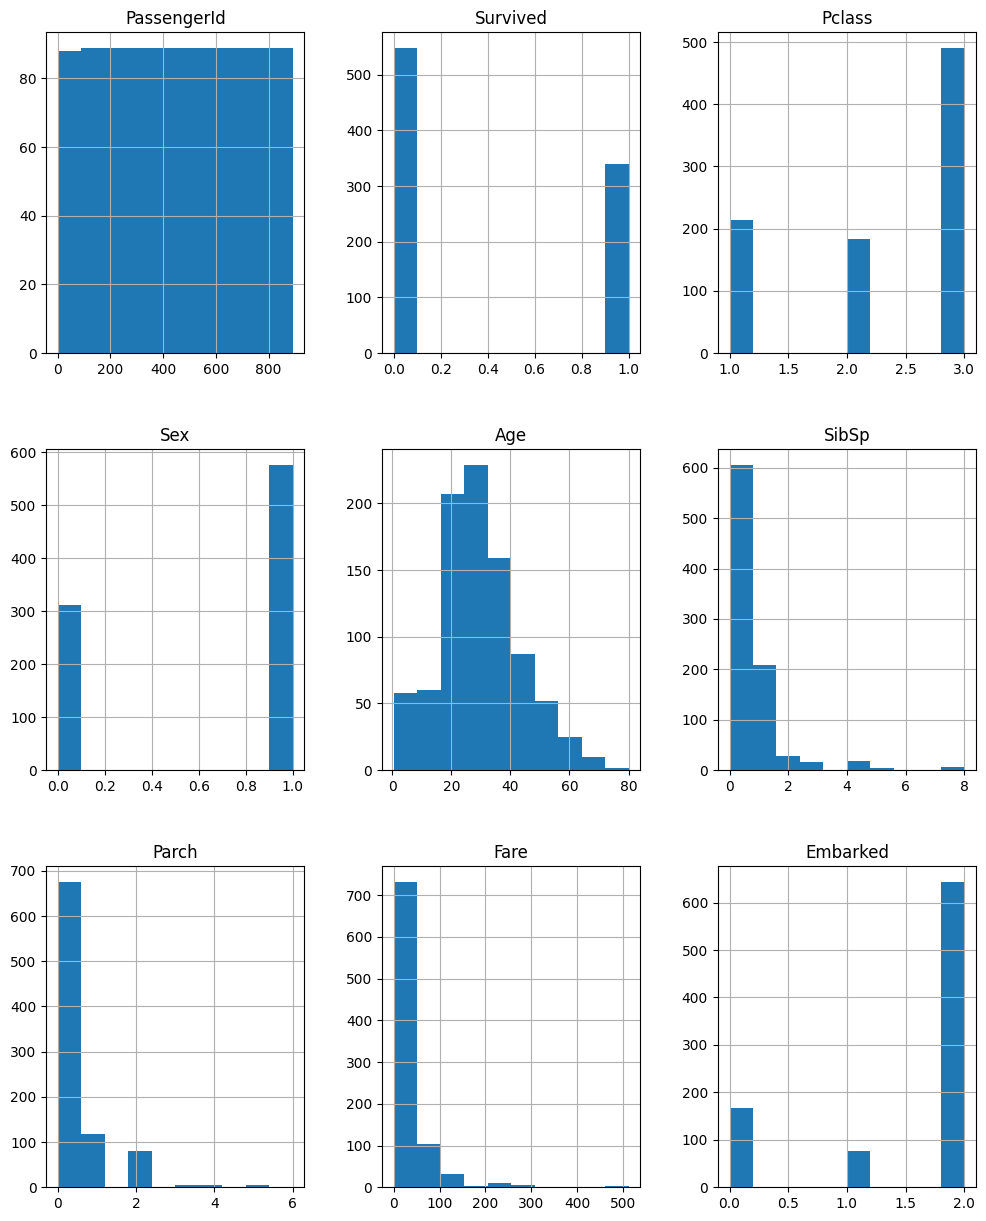

In [414]:
df.hist(figsize=(12, 15))

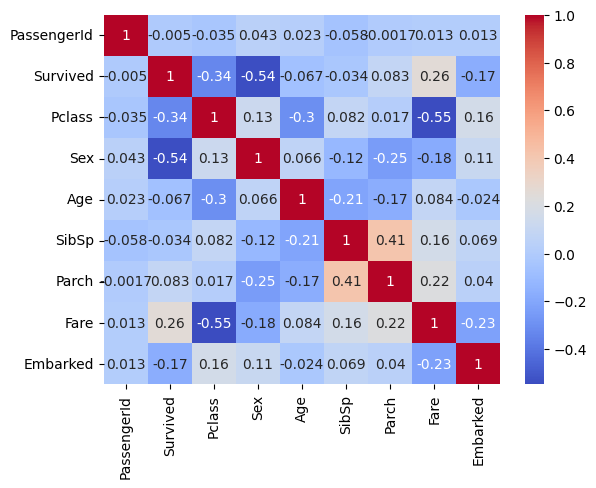

In [415]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [416]:
from sklearn.model_selection import train_test_split

features = df.drop('Survived', axis=1)
labels = df['Survived']


train_X, test_X, train_y, test_y= train_test_split(features, labels, test_size=0.2)

train_X = train_X.drop('PassengerId', axis=1)



from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# print(train_y.values.flatten())
log = LogisticRegression(random_state=42, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(), cv=5, scoring='accuracy')
print(scores.mean())

0.7834236186348862


## compare model and performance

In [417]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

def calcauate_acc(clf, X, y, scoring='accuracy'):
  score = cross_val_score(clf, X, y, cv=5, scoring=scoring)
  return score.mean()

clf = RandomForestClassifier(n_estimators=50, max_features="sqrt")
clf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=50)

<Axes: ylabel='feature'>

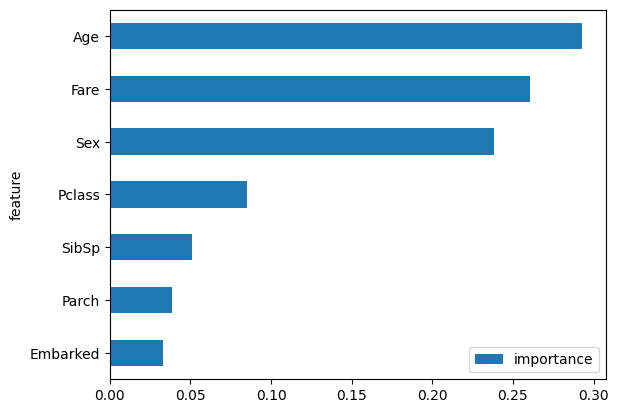

In [418]:
#特徵的重要性

feature = pd.DataFrame()
feature['feature'] = train_X.columns
feature['importance'] = clf.feature_importances_
feature.sort_values(by=['importance'], ascending=True, inplace=True)
feature.set_index('feature', inplace=True)

feature.plot(kind='barh')

In [419]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


svm = SVC()
rf = RandomForestClassifier(n_estimators=50, max_features="sqrt")

models = [svm, rf]

for model in models:
  print(f'cross validation {model}')
  score = calcauate_acc(model, train_X, train_y)
  print(f'CV score{score}')

cross validation SVC()
CV score0.6863587117108244
cross validation RandomForestClassifier(n_estimators=50)
CV score0.8058701861518763


In [420]:
parameter_grid = {
    'max_depth' : [ 4 , 6 , 8 ],
    'n_estimators' : [ 50 , 10 ],
    'max_features' : [ 'sqrt' ,'log2' ],
    'min_samples_split' : [ 2 , 3 , 10 ],
    'min_samples_leaf' : [ 1 , 3 , 10 ],
    'bootstrap' : [ True , False ]
    }

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf,
                           param_grid=parameter_grid,
                           cv=5,
                           scoring='accuracy'
                           )
grid_search.fit(train_X, train_y)
best_parameters = grid_search.best_params_
print('Best score', grid_search.best_score_)

model = RandomForestClassifier(**best_parameters)
model.fit(train_X, train_y)

Best score 0.8283856988082341


RandomForestClassifier(bootstrap=False, max_depth=8, min_samples_leaf=3,
                       n_estimators=10)

In [421]:
test_X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
732,733,2,1,17.0,0,0,0.0000,2
813,814,3,0,6.0,4,2,31.2750,2
792,793,3,0,19.0,8,2,69.5500,2
160,161,3,1,44.0,0,1,16.1000,2
91,92,3,1,20.0,0,0,7.8542,2
...,...,...,...,...,...,...,...,...
557,558,1,1,43.5,0,0,227.5250,0
228,229,2,1,18.0,0,0,13.0000,2
386,387,3,1,1.0,5,2,46.9000,2
795,796,2,1,39.0,0,0,13.0000,2


In [422]:
output = model.predict(val_X).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv')
df_output['PassengerId'] = aux[ 'PassengerId']
df_output['Survived'] = output
df_output[['PassengerId' , 'Survived']].to_csv( '/content/drive/MyDrive/1116031/Untitled folder/prediction/gridsearch_rf.csv' , index= False )

# pytorch

In [423]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# train data
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
df['Age'].interpolate(method='linear', axis=0, limit=None, inplace=True)
df.dropna(inplace=True)


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


# val_data
val_df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv')
val_df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

val_df.interpolate(method='linear', axis=0, limit=None, inplace=True)
val_df['Sex'] = label_encoder.fit_transform(val_df['Sex'])
val_df['Embarked'] = label_encoder.fit_transform(val_df['Embarked'])
val_X = val_df.drop('PassengerId', axis=1)
# test_y = test_df['Survived']

In [424]:
from sklearn.model_selection import train_test_split

features = df.drop('Survived', axis=1)
labels = df['Survived']


train_X, test_X, train_y, test_y= train_test_split(features, labels, test_size=0.2)

train_X = train_X.drop('PassengerId', axis=1)

In [425]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super(Net, self ).__init__()
    self.fc1 = nn.Linear(7, 100)
    self.dropout = nn.Dropout(0.1)
    self.fc2 = nn.Linear(100, 2)

  def forward(self, x):

    x = self.fc1(x)
    x = self.dropout(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.sigmoid(x)

    return x

net = Net()

In [426]:
batch_size = 50
num_epochs = 1000
learning_rate = 0.01
batch_no = len(train_X) // batch_size
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


train_loss_history = []


for epoch in range(num_epochs):


  for i in range(batch_no):
    start = i*batch_size
    end = start + batch_size

    x_tensor = torch.tensor(train_X[start:end].values, dtype=torch.float32)
    y_tensor = torch.tensor(train_y[start:end].values)

    optimizer.zero_grad()
    pred = net(x_tensor)
    loss = criterion(pred, y_tensor)
    loss.backward()
    train_loss_history.append(loss.item())
    optimizer.step()
  if epoch % 5 == 0:
    print(f'epoch : {epoch}, loss :{loss}')

epoch : 0, loss :0.5950098633766174
epoch : 5, loss :0.5643738508224487
epoch : 10, loss :0.5493263006210327
epoch : 15, loss :0.530756950378418
epoch : 20, loss :0.5393398404121399
epoch : 25, loss :0.5255334973335266
epoch : 30, loss :0.5278537273406982
epoch : 35, loss :0.518514096736908
epoch : 40, loss :0.5184694528579712
epoch : 45, loss :0.49965399503707886
epoch : 50, loss :0.4953760504722595
epoch : 55, loss :0.4910256564617157
epoch : 60, loss :0.47830891609191895
epoch : 65, loss :0.47351956367492676
epoch : 70, loss :0.48030444979667664
epoch : 75, loss :0.4784662127494812
epoch : 80, loss :0.4818219840526581
epoch : 85, loss :0.4674307703971863
epoch : 90, loss :0.4795917570590973
epoch : 95, loss :0.4927419424057007
epoch : 100, loss :0.4910864531993866
epoch : 105, loss :0.5051432251930237
epoch : 110, loss :0.4789923429489136
epoch : 115, loss :0.4861797094345093
epoch : 120, loss :0.47627395391464233
epoch : 125, loss :0.47746217250823975
epoch : 130, loss :0.490537256

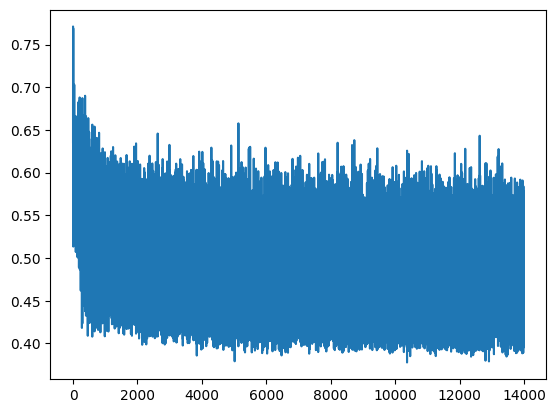

In [427]:
import matplotlib.pyplot as plt

plt.plot(train_loss_history)
plt.show()

In [433]:
import numpy as np
test_X_pred = test_X.drop('PassengerId', axis=1)
test_feature = torch.tensor(test_X_pred.values, dtype=torch.float32)
with torch.no_grad():
  result = net(test_feature)

preds = torch.max(result, 1)[1]
num_right = np.sum(preds.data.numpy() == test_y)
print(num_right/len(test_y))

0.8258426966292135


In [429]:
df_output = pd.DataFrame()
aux = test_X
df_output['PassengerId'] = aux[ 'PassengerId']
df_output['Survived'] = preds
df_output[['PassengerId' , 'Survived']].to_csv( '/content/drive/MyDrive/1116031/Untitled folder/prediction/pytorch_linear.csv' , index= False )